# CH04.분류(Classification)

## 분류의 개요

**분류를 구현하는 알고리즘**

1. 나이브 베이즈(Naive Bayes) : 베이즈 통계와 생성 모델에 기반
2. 로지스틱 회귀(Logistic Regression) : 독립변수와 종속 변수의 선형 관계성에 기류
3. 결정트리(Descision Tree) : 데이터 균일도에 따른 규칙 기반
4. 서포트 벡터 머신(Support Vector Machine) : 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아줌
5. 최소 근접(Nearest Neighbor) 알고리즘 : 근접거리 기준으로 분류
6. 심층 연결 기반의 신경망(Neural Network) -> 이미지, 영상, 음성, nlp
7. 앙상블(Ensemble) : 서로 다른(or같은) 머신러닝 알고리즘을 결합 -> 위의 영역을 제외한 정형 데이터의 예측 분석 영역에서 선호됨. 이번장에서 주로 다룸.

**앙상블**

1. 배깅(Bagging) 2. 부스팅(Boosting) 방식으로 나뉨
* 배깅 방식의 대표적인 예측기 = 랜덤포레스트(Random Forest)
* 최근에는 부스팅 방식으로 지속적으로 발전 중 : Xgboost와 lightGBM 등 


## 결정트리
: 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것. 

* 사전 가공의 영향이 적음
* But 예측 성능을 향상시키기 위해 복잡한 규칙구조를 가져야 하며, overfitting으로 예측 성능이 저하될 수도 있음.<br>
 -> 이러한 성능이 오히려 앙상블에서는 장점으로 작용 (결정트리가 좋은 약한 학습기가 됨) : 앙상블의 기본 알고리즘으로 일반적으로 사용됨.


* 결정 트리의 구조
    * 규칙노드(Descision Node)-규칙 조건, 리프노드(Leaf Node)- 결정된 클래스 값, 서브트리(Sub Tree)
    * 규칙이많다=과적합=트리의 깊이가 깊어질수록 예측 성능 저하될 가능성 ↑
    * 최대한 균일한 데이터셋을 구성할 수 있도록 분할하는 것이 필요
    * 정보 균일도가 높은 데이터셋을 먼저 선택
    

* 정보의 균일도를 측정하는 방법
1. 정보이득 지수 = 1- 엔트로피 지수 (정보이득이 높은 속성을 기준으로 분할)
2. 지니 계수 (낮을수록 균일도가 높음) -> 사이킷런의 DecisionTreeClassifier는 지니계수를 이용<br>
 -> 지니계수가 낮은 조건을 찾아서 반복분할 후, 데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정.

<span style="color:blue"><b>정보이론에 대한 추가학습</b></span><br>

### 결정트리 모델의 특징
1. 장점 : '균일도' 기반 -> 알고리즘이 쉽고 직관적, 룰이 명확, 정보의 균일도만 신경쓰면 되므로 데이터 사전 가공 필요 X
2. 단점 : 과적합으로 정확도가 떨어짐. (트리의 크기 사전 제한 필요)

### 결정 트리 파라미터

|    파라미터 명    | 설명                                                                                                                                                                                                                                                                       |
|:-----------------:|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| min_samples_split | - 노드를 분할하기 위한 최소한의 샘플 데이터수 → 과적합을 제어하는데 사용<br>- Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가                                                                                                                         |
|  min_samples_leaf | - 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수<br>- min_samples_split과 함께 과적합 제어 용도<br>- 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요                                                                                |
|    max_features   | - 최적의 분할을 위해 고려할 최대 feature 개수<br>- Default = None → 데이터 세트의 모든 피처를 사용<br>- int형으로 지정 →피처 갯수 / float형으로 지정 →비중<br>- sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정<br>- log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정 |
|     max_depth     | - 트리의 최대 깊이<br>- default = None<br>→ 완벽하게 클래스 값이 결정될 때 까지 분할<br>또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할<br>- 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요                                                             |
|   max_leaf_nodes  | 리프노드의 최대 개수                                                                                                                                                                                                                                                       |

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=11)

dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [3]:
# Graphviz는 C/C++ 운영체제에 포팅된 패키지 -> 파이썬 기반의 모듈로 인터페이스하려면 파이썬 래퍼 모듈 설치 필요
from sklearn.tree import export_graphviz

#export_graphviz(학습완료된 estimator,output 파일명,결정 클래스 명칭,피처 명칭...)
export_graphviz(dt_clf,out_file='tree.dot',class_names=iris_data.target_names,
               feature_names=iris_data.feature_names,impurity=True,filled=True)
    #impurity(불순도)는 지니계수 측정
    # export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성 ->Graphviz가 읽어서 시각화

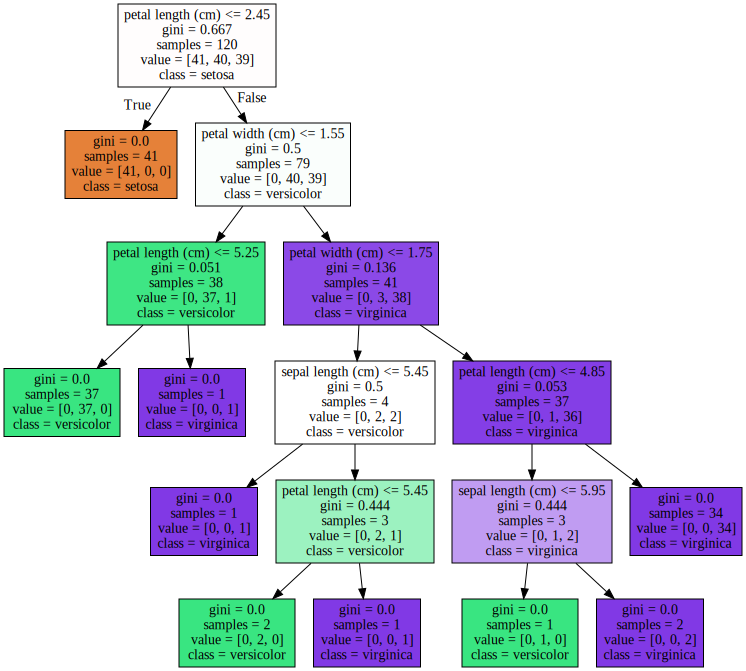

In [4]:
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 

import graphviz

with open("tree.dot") as f:#with ~ as 구문을 쓰면 인터프리터가 자동으로 close()해줌
    dot_graph = f.read()
graphviz.Source(dot_graph)

각 노드의 색깔은 붓꽃 데이터 레이블 값을 의미 -> 색깔이 짙어질수록 지니계수가 낮고 해당 레이블에 속하는 데이터가 많다는 뜻
* 주황색(0 : Setosa), 초록색(1:Versicolor) 보라색(2: Virginica)

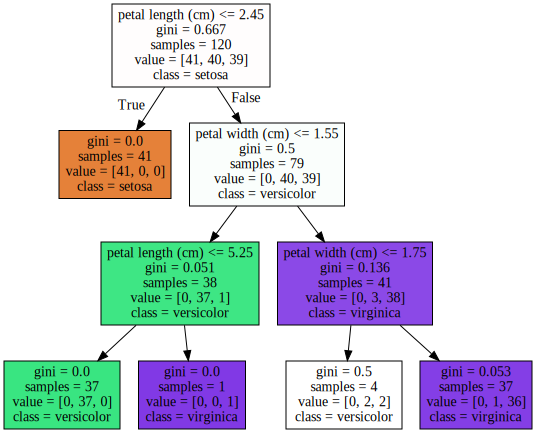

In [5]:
# 과적합 방지 위해 max_depth = 3으로 설정
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=3)
dt_clf.fit(X_train,y_train)

#export_graphviz(학습완료된 estimator,output 파일명,결정 클래스 명칭,피처 명칭...)
export_graphviz(dt_clf,out_file='tree.dot',class_names=iris_data.target_names,
               feature_names=iris_data.feature_names,impurity=True,filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

결정트리의 규칙을 정하는 피처의 중요도를 `DecisionTreeClassifier`의 `feature_importances_` 속성을 통해 확인 가능 
* `ndarray`형태로 값을 반환

In [6]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

Feature importances:
[0.    0.    0.558 0.442]


sepal length (cm):0.000
sepal width (cm):0.000
petal length (cm):0.558
petal width (cm):0.442


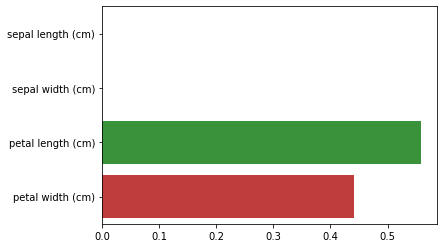

In [7]:
# feature별 importance 매핑
for name, value in zip(iris_data.feature_names,dt_clf.feature_importances_) :
    print('{0}:{1:.3f}'.format(name,value))

# feature importance를 column별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

### 결정트리 과적합(Overfitting)

* `make_classification()` : 분류를 위한 테스트용 데이터 생성

In [8]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

# feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. (2차원 시각화를 위해)
X_features, y_labels = make_classification(n_features=2,n_redundant=0,n_informative=2,
                                         n_classes=3,n_clusters_per_class=1,random_state=0)


In [9]:
X_features

array([[ 0.12041909, -1.68941375],
       [ 1.09665605,  1.79445113],
       [ 0.88426577,  1.43370121],
       [ 0.95048011, -0.56202253],
       [ 1.04421447,  0.02899023],
       [ 0.50102164, -1.27508231],
       [ 1.10447379,  0.35117341],
       [-2.5077599 ,  2.48857017],
       [-0.00811816,  0.11564734],
       [ 0.31338067, -0.87926516],
       [-0.04687748,  1.35489986],
       [ 1.20888898,  0.64232637],
       [ 1.71173001, -1.04637674],
       [ 1.29670808, -0.6054158 ],
       [ 1.24188996, -0.3819388 ],
       [-1.78273822,  1.52817583],
       [-1.50514147,  1.27186707],
       [ 0.87163989, -0.42276158],
       [ 2.53026908, -1.61974843],
       [ 0.95000368,  1.83240861],
       [-1.53716448, -0.89497353],
       [-2.13650855,  2.73389996],
       [ 1.01037788,  0.59402713],
       [ 1.9876467 , -0.22375521],
       [ 1.12463497,  2.13646176],
       [-0.65122279,  0.97865617],
       [ 0.85144036,  0.42548085],
       [-0.10789457, -0.65942376],
       [-0.41699944,

In [10]:
y_labels

array([0, 1, 1, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 2, 1, 2, 0,
       1, 2, 1, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 2, 1, 0, 1, 1, 0, 2, 0, 2, 0, 0, 2, 1, 1,
       0, 1, 1, 2, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 2, 1, 2, 1, 0, 2, 1, 1,
       1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0])

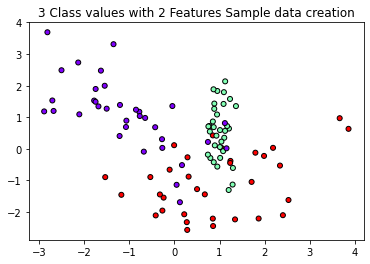

In [11]:
#scatterplot으로 시각화

plt.title("3 Class values with 2 Features Sample data creation")
plt.scatter(X_features[:,0],X_features[:,1],marker='o',c=y_labels,s=25,cmap='rainbow',edgecolor='k')

In [12]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

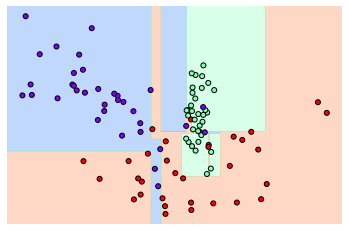

In [13]:
# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

결정 트리에 제한을 두지 않으면 일부 이상치(Outlier) 데이터까지 분류가 일어나기 때문에 모델이 복잡해지고 예측 성능이 떨어짐. 

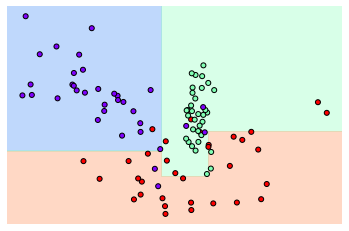

In [14]:
# min_samples_leaf=6 -> 노드의 sample이 6개 이하면 leafnode로 분류.
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

### 결정 트리 실습 : 사용자 행동 인식 데이터셋
> https://archive.ics.uci.edu/ml/machine-learning-databases/00240/



Feature Selection
=================

The features selected for this database come from the accelerometer and gyroscope 3-axial raw signals tAcc-XYZ and tGyro-XYZ. These time domain signals (prefix 't' to denote time) were captured at a constant rate of 50 Hz. Then they were filtered using a median filter and a 3rd order low pass Butterworth filter with a corner frequency of 20 Hz to remove noise. Similarly, the acceleration signal was then separated into body and gravity acceleration signals (tBodyAcc-XYZ and tGravityAcc-XYZ) using another low pass Butterworth filter with a corner frequency of 0.3 Hz. <br><br>Subsequently, the body linear acceleration and angular velocity were derived in time to obtain Jerk signals (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ). Also the magnitude of these three-dimensional signals were calculated using the Euclidean norm (tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag, tBodyGyroJerkMag). <br><br>Finally a Fast Fourier Transform (FFT) was applied to some of these signals producing fBodyAcc-XYZ, fBodyAccJerk-XYZ, fBodyGyro-XYZ, fBodyAccJerkMag, fBodyGyroMag, fBodyGyroJerkMag. (Note the 'f' to indicate frequency domain signals). <br><br>These signals were used to estimate variables of the feature vector for each pattern:  <br>'-XYZ' is used to denote 3-axial signals in the X, Y and Z directions.<br><br>tBodyAcc-XYZ<br>tGravityAcc-XYZ<br>tBodyAccJerk-XYZ<br>tBodyGyro-XYZ<br>tBodyGyroJerk-XYZ<br>tBodyAccMag<br>tGravityAccMag<br>tBodyAccJerkMag<br>tBodyGyroMag<br>tBodyGyroJerkMag<br>fBodyAcc-XYZ<br>fBodyAccJerk-XYZ<br>fBodyGyro-XYZ<br>fBodyAccMag<br>fBodyAccJerkMag<br>fBodyGyroMag<br>fBodyGyroJerkMag<br><br>The set of variables that were estimated from these signals are: <br><br>mean(): Mean value<br>std(): Standard deviation<br>mad(): Median absolute deviation <br>max(): Largest value in array<br>min(): Smallest value in array<br>sma(): Signal magnitude area<br>energy(): Energy measure. Sum of the squares divided by the number of values. <br>iqr(): Interquartile range <br>entropy(): Signal entropy<br>arCoeff(): Autorregresion coefficients with Burg order equal to 4<br>correlation(): correlation coefficient between two signals<br>maxInds(): index of the frequency component with largest magnitude<br>meanFreq(): Weighted average of the frequency components to obtain a mean frequency<br>skewness(): skewness of the frequency domain signal <br>kurtosis(): kurtosis of the frequency domain signal <br>bandsEnergy(): Energy of a frequency interval within the 64 bins of the FFT of each window.<br>angle(): Angle between to vectors.<br><br>Additional vectors obtained by averaging the signals in a signal window sample. These are used on the angle() variable:<br><br>gravityMean<br>tBodyAccMean<br>tBodyAccJerkMean<br>tBodyGyroMean<br>tBodyGyroJerkMean<br><br>The complete list of variables of each feature vector is available in 'features.txt'


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('.\\data\\human_activity\\features.txt',sep='\s+',
                        header=None,names=['column_index','column_name']);feature_name_df

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [30]:
# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


인체의 움직임과 관련된 속성이 XYZ값으로 되어있음. 

In [33]:
#중복된 피처명 확인 -> 중복피처명은 DataFrame에서 Duplicate name error
feature_dup_df = feature_name_df.groupby('column_name').count();feature_dup_df

,column_index
column_name,
"angle(X,gravityMean)",1
"angle(Y,gravityMean)",1
"angle(Z,gravityMean)",1
"angle(tBodyAccJerkMean),gravityMean)",1
"angle(tBodyAccMean,gravity)",1
...,...
tGravityAccMag-max(),1
tGravityAccMag-mean(),1
tGravityAccMag-min(),1


In [35]:
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1]

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3
"fBodyAcc-bandsEnergy()-25,32",3
"fBodyAcc-bandsEnergy()-25,48",3
"fBodyAcc-bandsEnergy()-33,40",3
"fBodyAcc-bandsEnergy()-33,48",3


In [44]:
# 중복 feature명에 대해서 원본 feature 명에 '_1(또는2)'를 추가로 부여하는 함수인 get_new_feature_name_df() 생성

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index() #왜?
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                               if x[1] >0 else x[0] , axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df


In [43]:
feature_dup_df = pd.DataFrame(data=feature_name_df.groupby('column_name').cumcount(),
                              columns=['dup_cnt']);feature_dup_df
#feature_dup_df[feature_dup_df['dup_cnt']>0] 

,dup_cnt
0,0
1,0
2,0
3,0
4,0
...,...
556,0
557,0
558,0
559,0


In [86]:
def get_human_dataset( ):
    feature_name_df = pd.read_csv('.\\data\\human_activity\\features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    new_feature_name_df = get_new_feature_name_df(feature_name_df) #중복피처명 수정
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 
    # 컬럼명(헤더가 없으면 names속성으로 부여)은 feature_name 적용
    X_train = pd.read_csv('.\\data\\human_activity\\train\\X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('.\\data\\human_activity\\test\\X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('.\\data\\human_activity\\train\\y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('.\\data\\human_activity\\test\\y_test.txt',sep='\s+',header=None,names=['action'])
    
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [47]:
# 학습 피처 데이터셋 info
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


7352개의 레코드(0~7351), 561개의 feature 가짐. 

In [48]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [49]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

결정 클래스 값은 1~6으로 특정 값에 왜곡되지 않고 비교적 고르게 분포

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [53]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8548


In [54]:
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
#하이퍼파라미터 튜닝 - GridSearchCV

params = {'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]}

grid_cv = GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1) 
                        #verbose속성 : 얼마나 상세하게 보여줄 것인지
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  3.5min finished


GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [62]:
cv_result_df = pd.DataFrame(grid_cv.cv_results_)
cv_result_df[['param_max_depth','mean_test_score','rank_test_score']]

,param_max_depth,mean_test_score,rank_test_score
0,6,0.850791,5
1,8,0.851069,3
2,10,0.851209,2
3,12,0.844135,7
4,16,0.851344,1
5,20,0.850800,4
6,24,0.849440,6


In [63]:
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


max_depth가 8을 넘으면 정확도가 계속 감소. 트리 깊이가 깊어질수록 과적합 위험 있음.

In [64]:
params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  4.4min finished


GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [68]:
best_dt_clf = grid_cv.best_estimator_
pred1 = best_dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


In [69]:
import seaborn as sns

ftr_importances_values = best_dt_clf.feature_importances_;ftr_importances_values

array([0.        , 0.        , 0.        , 0.        , 0.00175182,
       0.        , 0.        , 0.        , 0.        , 0.00217984,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00034009, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00997154, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00122902,
       0.00629033, 0.        , 0.2533544 , 0.002077  , 0.00291231,
       0.        , 0.        , 0.02047009, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0024461 , 0.        , 0.        ,
       0.        , 0.00302454, 0.        , 0.        , 0.10188

In [71]:
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns);ftr_importances

tBodyAcc-mean()-X                       0.000000
tBodyAcc-mean()-Y                       0.000000
tBodyAcc-mean()-Z                       0.000000
tBodyAcc-std()-X                        0.000000
tBodyAcc-std()-Y                        0.001752
                                          ...   
angle(tBodyGyroMean,gravityMean)        0.001291
angle(tBodyGyroJerkMean,gravityMean)    0.000000
angle(X,gravityMean)                    0.000989
angle(Y,gravityMean)                    0.139001
angle(Z,gravityMean)                    0.002987
Length: 561, dtype: float64

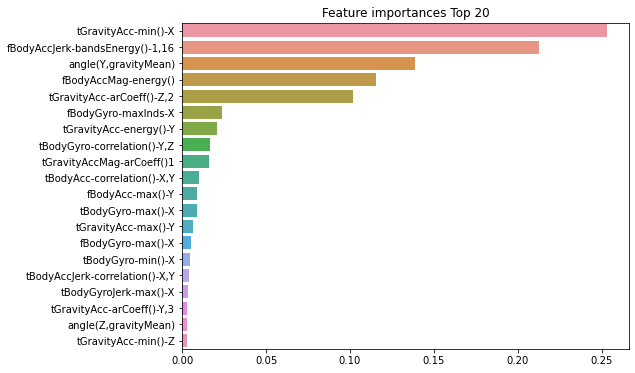

In [72]:
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()

## 앙상블 학습

**앙상블 학습의 유형**

1. 보팅(Voting)
2. 배깅(Bagging)

* 보팅과 배깅은 여러개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식.
    * 다른점 : 보팅 = 일반적으로 서로 다른 알고리즘을 가진 분류기 결합, (학습 데이터셋 동일,알고리즘 다름) <br>
        배깅 = 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만 데이터 샘플링을 서로 다르게. (학습 데이터셋 다르게, 알고리즘 동일)
    
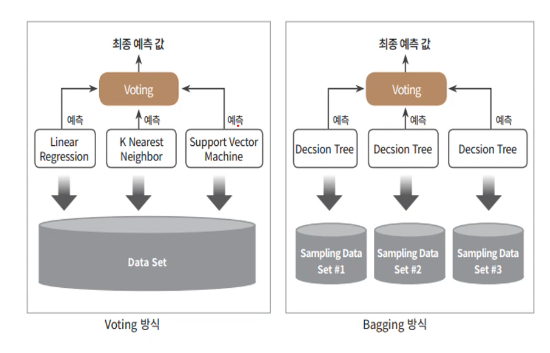

개별 Classifier에게 데이터를 샘플링해서 추출하는 방식 = 부트스트래핑(Bootstraping) 분할 방식<br>
교차검증은 데이터셋 중첩을 허용하지 않지만, Bagging방식은 데이터셋 중첩을 허용. 


3. 부스팅(Boosting)
* 여러개의 분류기가 순차적으로 학습을 진행, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 다음 분류기에 가중치(weight)를 부여. -> 계속해서 분류기에 가중치를 부스팅해서 부스팅 방식.
    * 그래디언트 부스트, XGBoost, LightGBM 등

4. 스태깅 등....
* 여러 가지 모델의 예측 결과값을 다시 학습 데이터로 만들어서 메타모델로 재학습시켜 결과를 예측.
* 앙상블의 앙상블

### 보팅 유형 - 하드보팅(Hard Voting)과 소프트 보팅(Soft Voting)

1. 하드보팅 
* 다수결 원칙 = 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정.

2. 소프트보팅
* 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서, 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정.

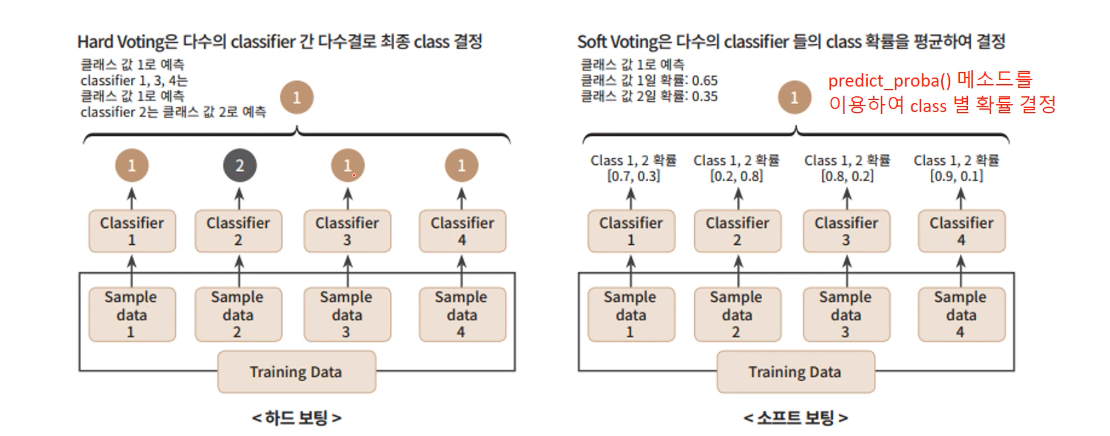

일반적으로 하드보팅보다 소프트보팅이 예측 성능이 좋아 더 많이 사용

### 보팅 분류기(Voting Classifier)

사이킷런에서 보팅 방식의 앙상블을 구현한 `VotingClassifier`클래스 사용
* 주요 인자로 `estimators`와 `voting`[default='hard', 'hard'/'soft'로 보팅 방식 지정]값을 입력받음. 

In [74]:
#위스콘신 유방암 데이터셋 로드
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer=load_breast_cancer()
data_df = pd.DataFrame(cancer.data,columns=cancer.feature_names) ;data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [78]:
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

In [79]:
# 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)],voting='soft')
X_trian,X_test,y_trian,y_test = train_test_split(cancer.data,cancer.target,test_size=0.2,random_state=156)

In [80]:
# Voting Classifier 학습,예측,평가
vo_clf.fit(X_train,y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도 : {0:0.4f}'.format(accuracy_score(y_test,pred)))

# 개별 모델의 학습,예측,평가
classifiers = [lr_clf,knn_clf]
for classifier in classifiers :
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name,accuracy_score(y_test,pred)))

Voting 분류기 정확도 : 0.9474
LogisticRegression 정확도 : 0.9386
KNeighborsClassifier 정확도 : 0.9386


<span style="color:blue"><b>편향-분산 트레이드오프에 대한 추가학습</b></span><br>

## 랜덤 포레스트

대표적인 배깅(같은 알고리즘으로 여러개의 분류기를 만들고 보팅으로 최종 결정하는 알고리즘) 방식
* 비교적 빠른 수행 속도
* (배깅/부스팅은 대부분) 결정트리 알고리즘 기반 - 결정트리의 쉽고 직관적인 장점 대부분 포함.

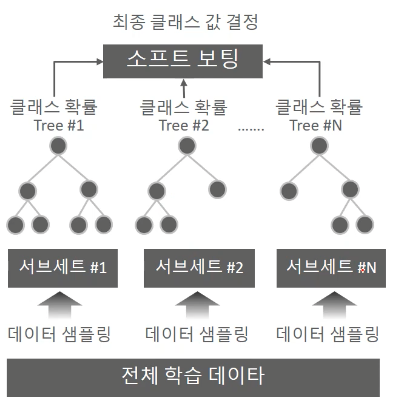

전체 데이터셋 중 일부가 중첩되게 샘플링 된 데이터셋 (= __부트스트래핑/Bootstrapping__ 분할 방식) 사용<br>
-> 배깅 = Bootstrap aggregating = Bagging

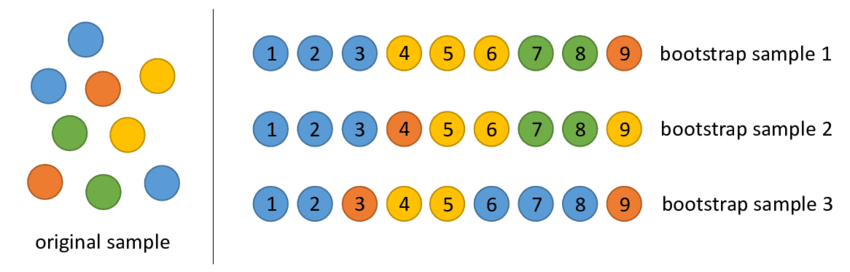

↑ n_estimatirs=3으로 지정했을 때.

* 서브세트의 데이터 건수는 전체 데이터 건수와 동일, 개별 데이터가 중첩되어 만들어짐.

사이킷런에서 `RandomForestClassfier` 클래스 사용

In [90]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train,X_test,y_train,y_test = get_human_dataset()

# 랜덤포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('랜덤 포레스트 정확도 : {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도 : 0.9253


앞선 결정 트리 한 개의 예측 정확도: 0.8548 -> 랜덤포레스트를 사용하면 92.53%의 정확도

### 랜덤 포레스트 하이퍼 파라미터 및 튜닝

트리 기반 앙상블 알고리즘의 단점 : 하이퍼 파라미터가 너무 많고, 튜닝을 위한 시간 소모 ↑

랜덤 포레스트의 파라미터 종류

| 파라미터명 | 설명 |
|:-:|-|
| n_estimators | - 결정트리의 갯수를 지정.<br> - default = 10<br>- 많이 설정할수록 좋은 성능을 기대할 수 있지만,<br>  무조건 성능이 향상되는 것은 아니며 수행 시간도 오래 걸림 |
| max_features | - 최적의 분할을 위해 고려할 최대 feature 개수<br>- default = 'auto' (결정트리에서는 default가 none이었음)<br>- int형으로 지정 →피처 갯수 / float형으로 지정 →비중<br>- auto(또는 sqrt) : 전체 피처 중 √(피처개수) 만큼 선정<br>- log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정 |
| min_samples_split | - 노드를 분할하기 위한 최소한의 샘플 데이터수<br>→ 과적합을 제어하는데 사용<br>- default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가 |
| min_samples_leaf | - 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수<br>- min_samples_split과 함께 과적합 제어 용도<br>- 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요 |
| max_depth | - 트리의 최대 깊이<br>- default = None<br>→ 완벽하게 클래스 값이 결정될 때 까지 분할<br>또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할<br>- 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요 |
| max_leaf_nodes | 리프노드의 최대 개수 |

In [91]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0,n_jobs=-1)
grid_cv = GridSearchCV(rf_clf,param_grid=params,cv=2,n_jobs=-1)
grid_cv.fit(X_train,y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


In [93]:
# n_estimators를 300으로 증가시킴
rf_clf1 = RandomForestClassifier(n_estimators=300,max_depth=10,min_samples_leaf=8,
                                 min_samples_split=8,random_state=0)
rf_clf1.fit(X_train,y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9165


In [94]:
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]


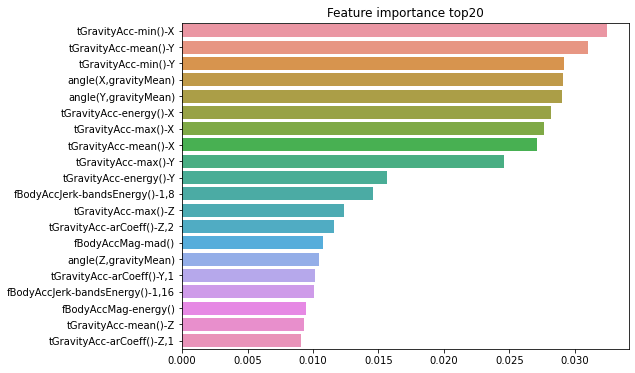

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(8,6))
plt.title('Feature importance top20')
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()

## BM(Gradient Boosting Machine)